In [2]:
import numpy as np
import pandas as pd
import gensim
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
documents = pd.read_csv('/content/TextNLP.csv')

# print(documents)
documents = [x for x in documents['text']]
# print(documents)
import re
def text_preprocessing(
        text: list,
        punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
        stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also',
                    'on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as']
) -> list:
    """
    A method to preproces text
    """
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x != '']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text


In [4]:
tokenized_documents = []
for text in documents:
    # Cleaning the text
    text = text_preprocessing(text)
    tokenized_documents.append(text)

model = gensim.models.Word2Vec(tokenized_documents, vector_size=10, window=5, min_count=1, workers=4)
word_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

In [5]:
em_v1 = list(set([word for word in tokenized_documents[0] if word in word_embeddings]))
em_v2 = list(set([word for word in tokenized_documents[1] if word in word_embeddings]))
em_v3 = list(set([word for word in tokenized_documents[2] if word in word_embeddings]))
em_v4 = list(set([word for word in tokenized_documents[3] if word in word_embeddings]))
em_v5 = list(set([word for word in tokenized_documents[4] if word in word_embeddings]))

In [6]:
em_w1 =[word_embeddings[em_v1[i]] for i in range(len(em_v1))]
em_w2 =[word_embeddings[em_v2[i]] for i in range(len(em_v2))]
em_w3 =[word_embeddings[em_v3[i]] for i in range(len(em_v3))]
em_w4 =[word_embeddings[em_v4[i]] for i in range(len(em_v4))]
em_w5 =[word_embeddings[em_v5[i]] for i in range(len(em_v5))]

## for doc1 and doc2

In [7]:
em_v1 ,em_v2

(['builds',
  'ethics',
  'values',
  'you',
  'better',
  'involved',
  'playing',
  'live',
  'personality',
  'sports',
  'skills',
  'activities',
  'way',
  'getting',
  'to',
  'your',
  'good',
  'such',
  'life',
  'teaches'],
 ['which',
  'human',
  'sports',
  'keeps',
  'fit',
  'essential',
  'very',
  'every',
  'strength',
  'physical',
  'stage',
  'them',
  'fine',
  'it',
  'great',
  'each',
  'importance',
  'has',
  'life'])

## cosine similarty for doc1 & doc2




##Pros:
####Cosine Similarity is scale invariant meaning it is not affected by the magnitude of the vectors being compared and only considers vector direction as it measures the cosine of the angle between two vectors.
##Cons:
####Cosine similarity does not take into account the magnitude of vectors. It treats vectors with the same direction but different magnitudes as similar, which may not always be desirable.

In [8]:
cos_si_12 =cosine_similarity(em_w1,em_w2)
cos_si_12.shape

(20, 19)

In [9]:
cos_si_12

array([[-6.69347793e-02,  3.50334197e-01, -1.56739086e-01,
         4.00972843e-01,  1.21493727e-01, -7.15862662e-02,
         2.42462847e-02,  7.58688003e-02, -2.65362635e-02,
        -2.62877643e-01,  3.20250355e-02, -3.31124961e-01,
        -3.49006355e-01,  4.69668359e-02,  4.82641794e-02,
        -9.45002735e-02, -3.10475916e-01, -6.24536753e-01,
         1.47111118e-01],
       [-1.62275463e-01,  6.09756932e-02, -3.35216373e-01,
         2.82713324e-01,  3.53751034e-01, -2.00881660e-01,
        -2.73246586e-01,  2.15837583e-01,  5.43061867e-02,
        -4.92895335e-01,  4.24569935e-01, -5.78869462e-01,
         4.09988947e-02, -3.18659663e-01, -2.85800517e-01,
         3.31750244e-01,  1.19932286e-01, -5.89294016e-01,
         4.12401855e-01],
       [ 2.72207201e-01, -1.93974555e-01,  6.20890260e-01,
        -1.44990072e-01,  3.61526534e-02, -4.41615954e-02,
        -3.45134825e-01,  2.85265207e-01,  1.22334361e-01,
        -7.96098262e-03,  2.72755343e-02,  7.88340211e-01,
    

## heatmap for cosine similarty

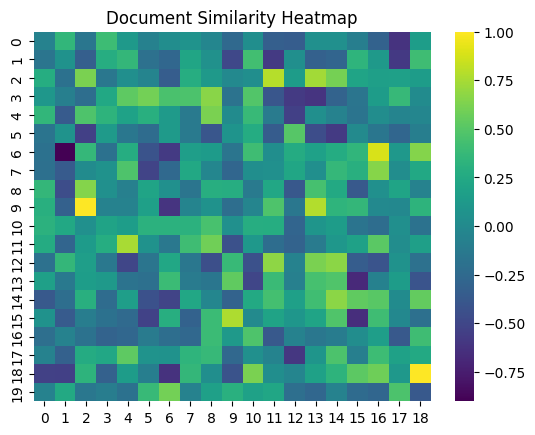

In [10]:
sns.heatmap(cos_si_12, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

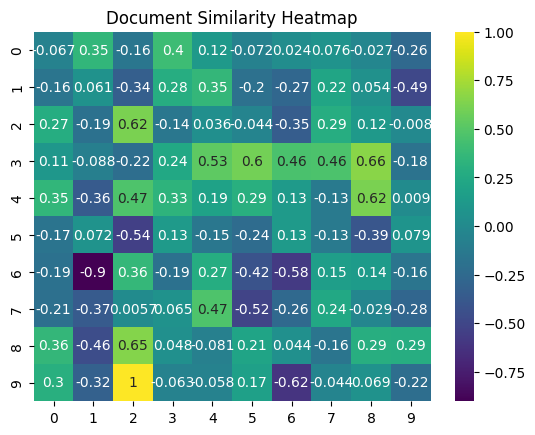

In [11]:
sns.heatmap(cos_si_12[:10,:10], annot=True, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

## MDS for cosine similarty

In [12]:
cos_si_21=cosine_similarity(em_w2,em_w1)
mds = MDS(n_components=2, random_state=42)
embedding = mds.fit_transform(cos_si_12)
mds = MDS(n_components=2, random_state=42)
embedding1 = mds.fit_transform(cos_si_21)
embedding ,embedding1

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(array([[ 0.87036455, -0.55397575],
        [ 1.53569869,  0.42469253],
        [-1.13486007,  0.61323931],
        [ 1.06861981, -1.39400421],
        [ 0.09627814, -0.51605736],
        [ 1.67402999, -0.57892463],
        [ 0.06792557,  1.5813896 ],
        [ 0.19662017,  0.94242433],
        [-0.84544712, -0.26874314],
        [-1.18999776,  0.95106352],
        [-0.01985967, -0.90514228],
        [ 0.70013269,  0.54802533],
        [-1.78391325, -0.53719419],
        [-1.30062386, -0.88836171],
        [-0.41652786,  1.3580196 ],
        [-0.94240344, -1.17593822],
        [ 0.99610313,  0.01369046],
        [ 0.00921519,  0.22444913],
        [ 0.44347077,  1.68474909],
        [-0.02482569, -1.52340138]]),
 array([[-0.68320644,  0.29139556],
        [-1.94883102,  0.16452825],
        [ 1.28945488,  0.3466369 ],
        [-0.74717843, -0.37472083],
        [-0.01242941, -1.10963687],
        [-1.27014596, -0.37626544],
        [-1.67537323,  0.79101828],
        [ 0.17062247, -0.5

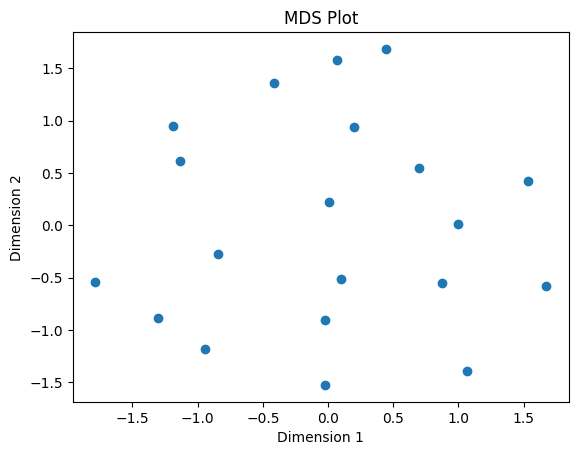

In [13]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

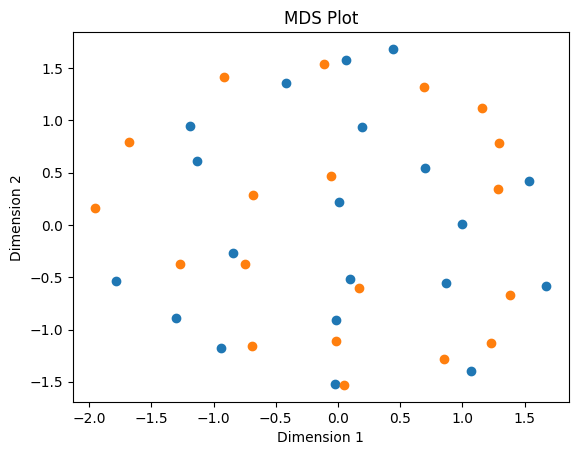

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.scatter(embedding1[:, 0], embedding1[:, 1])
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Euclidean for doc1 & doc2

##Pros:
####Euclidean distance considers both the direction and magnitude of vectors. It is suitable when the absolute values of vector elements are important, and you want to penalize larger differences in magnitude.
##Cons:
####Eucledian Distance can be sensitive to the scaling of the data, as vectors with large values will dominate.

In [15]:
euclidean_12 =euclidean_distances(em_w1,em_w2)
euclidean_12.shape

(20, 19)

In [16]:
euclidean_12

array([[0.27782896, 0.23636268, 0.277636  , 0.2216692 , 0.26572406,
        0.2703627 , 0.27030084, 0.2574141 , 0.25112385, 0.2937502 ,
        0.26296142, 0.3071366 , 0.30425462, 0.25587818, 0.25576934,
        0.27183262, 0.35383406, 0.2876731 , 0.24431272],
       [0.25861788, 0.2587916 , 0.26351377, 0.22153015, 0.20824315,
        0.25348893, 0.27616838, 0.21184446, 0.21038158, 0.2829503 ,
        0.18161559, 0.29732072, 0.22773306, 0.26659545, 0.2633545 ,
        0.18824422, 0.2691715 , 0.24577117, 0.18081208],
       [0.23781432, 0.32936922, 0.16808031, 0.31571263, 0.28706405,
        0.2767051 , 0.3279003 , 0.23473486, 0.24260774, 0.27229062,
        0.2729364 , 0.12932716, 0.25249562, 0.14264861, 0.17349136,
        0.24052964, 0.29105654, 0.22258139, 0.2539566 ],
       [0.2692183 , 0.32026723, 0.30222276, 0.26255628, 0.20561805,
        0.17889127, 0.21383785, 0.20939751, 0.16254188, 0.3009512 ,
        0.20424624, 0.33189747, 0.34779644, 0.35203844, 0.31610885,
        0.297

## heatmap for Euclidean

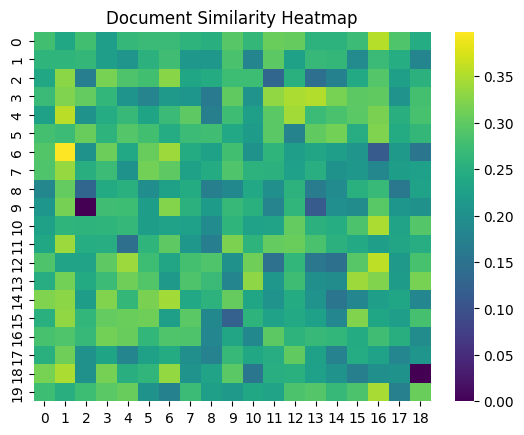

In [17]:
sns.heatmap(euclidean_12, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

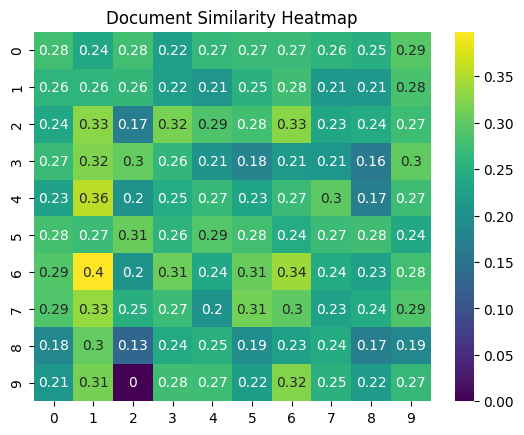

In [18]:
sns.heatmap(euclidean_12[:10,:10], annot=True, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

## MDS for Euclidean

In [19]:
ec_21=euclidean_distances(em_w2,em_w1)
mds = MDS(n_components=2, random_state=42)
embedding = mds.fit_transform(euclidean_12)
mds = MDS(n_components=2, random_state=42)
embedding1 = mds.fit_transform(ec_21)
embedding ,embedding1

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(array([[-0.1144446 ,  0.13211593],
        [-0.14516683, -0.03650901],
        [ 0.15574157, -0.11008892],
        [-0.23669989,  0.1394577 ],
        [-0.06295885,  0.10618988],
        [-0.08366639,  0.20173665],
        [-0.06664046, -0.22909864],
        [-0.06959342, -0.11729901],
        [ 0.18280673, -0.03854237],
        [ 0.22645861, -0.19945091],
        [ 0.01617205,  0.11474111],
        [-0.19824421, -0.03317104],
        [ 0.24043925,  0.1158162 ],
        [ 0.1487112 ,  0.17288958],
        [ 0.01974334, -0.18869388],
        [ 0.15608952,  0.08762192],
        [-0.07107553,  0.01764198],
        [ 0.00983016, -0.06648933],
        [-0.14369752, -0.27916009],
        [ 0.03619526,  0.21029224]]),
 array([[-0.04710011, -0.07625124],
        [-0.0116382 , -0.34743281],
        [-0.19987553,  0.21705591],
        [ 0.12608579, -0.14053294],
        [ 0.19517248,  0.00294842],
        [ 0.04290895, -0.06643499],
        [ 0.0572201 , -0.25234654],
        [ 0.07841822,  0.0

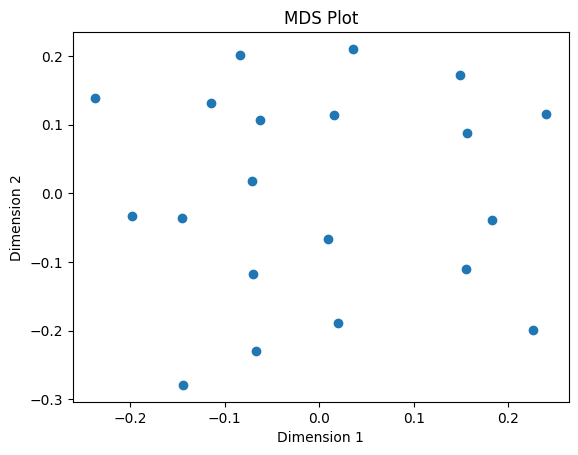

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

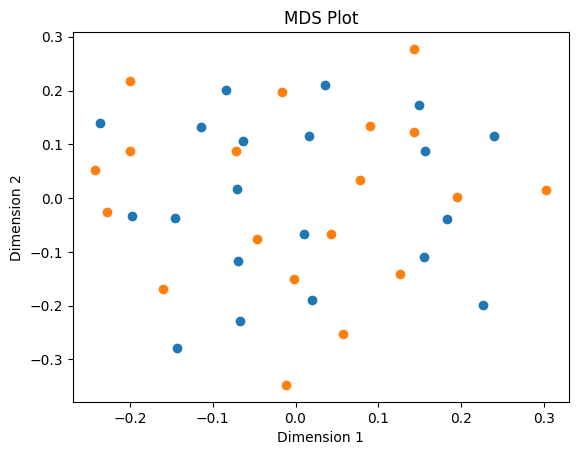

In [21]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.scatter(embedding1[:, 0], embedding1[:, 1])
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Jaccard for doc1 & doc2


##Pros:
####Jaccard similarity is often used for comparing sets of elements. It is effective when the order or magnitude of elements in the vectors is not important, and you are interested in the overlap of elements.
##Cons:
####Jaccard Similarity is based on the presence/absence of elements and is more effective when used with binary data, thus will not be explored any further.

In [33]:
set1 = set(np.array(em_w1).flatten().tolist())
set2 = set(np.array(em_w2).flatten().tolist())
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
Jaccard =  intersection / union
Jaccard

0.05405405405405406

In [41]:
pd=np.dot(np.array(em_w1),np.array(em_w2).T)
n1=pow(np.linalg.norm(np.array(em_w1)),2)
n2=pow(np.linalg.norm(np.array(em_w2)),2)
Jaccard2 = pd /(n1+n2-pd)
Jaccard2

array([[-1.79831695e-03,  1.12581756e-02, -3.83948698e-03,
         1.23684155e-02,  3.64830159e-03, -1.80330465e-03,
         6.76843687e-04,  2.02594814e-03, -5.88615658e-04,
        -6.61052391e-03,  8.50865908e-04, -8.64751823e-03,
        -8.80201720e-03,  1.19515660e-03,  1.22891285e-03,
        -2.35192478e-03, -1.07652880e-02, -1.09372092e-02,
         3.82998702e-03],
       [-3.42039508e-03,  1.52495515e-03, -6.43580686e-03,
         6.81509450e-03,  8.38678610e-03, -3.96782113e-03,
        -5.95422741e-03,  4.54041921e-03,  9.48033237e-04,
        -9.70946625e-03,  8.93572997e-03, -1.18411565e-02,
         8.20412009e-04, -6.32414501e-03, -5.67894708e-03,
         6.54595718e-03,  3.31426226e-03, -8.13252944e-03,
         8.47604312e-03],
       [ 7.86237977e-03, -6.52054744e-03,  1.65255796e-02,
        -4.68185171e-03,  1.15306245e-03, -1.18524919e-03,
        -1.01476414e-02,  8.16059299e-03,  2.89941463e-03,
        -2.14532862e-04,  7.71556108e-04,  2.26127468e-02,
    

In [42]:
Jaccard2.shape

(20, 19)

## heatmap for Jaccard (Tanimoto)

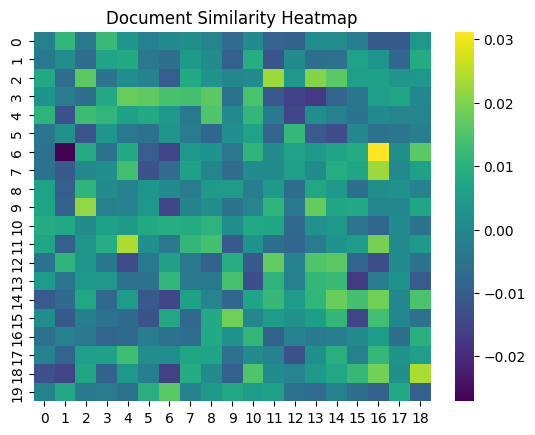

In [43]:
sns.heatmap(Jaccard2, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

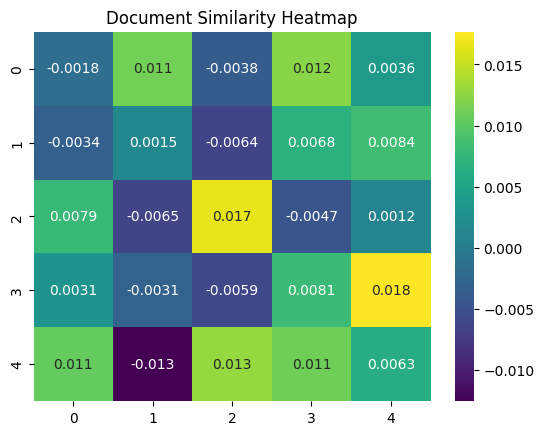

In [45]:
sns.heatmap(Jaccard2[:5,:5], annot=True, cmap='viridis')
plt.title('Document Similarity Heatmap')
plt.show()

## MDS for Jaccard

In [46]:
mds = MDS(n_components=2, random_state=42)
embedding = mds.fit_transform(euclidean_12)
embedding

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[-0.1144446 ,  0.13211593],
       [-0.14516683, -0.03650901],
       [ 0.15574157, -0.11008892],
       [-0.23669989,  0.1394577 ],
       [-0.06295885,  0.10618988],
       [-0.08366639,  0.20173665],
       [-0.06664046, -0.22909864],
       [-0.06959342, -0.11729901],
       [ 0.18280673, -0.03854237],
       [ 0.22645861, -0.19945091],
       [ 0.01617205,  0.11474111],
       [-0.19824421, -0.03317104],
       [ 0.24043925,  0.1158162 ],
       [ 0.1487112 ,  0.17288958],
       [ 0.01974334, -0.18869388],
       [ 0.15608952,  0.08762192],
       [-0.07107553,  0.01764198],
       [ 0.00983016, -0.06648933],
       [-0.14369752, -0.27916009],
       [ 0.03619526,  0.21029224]])

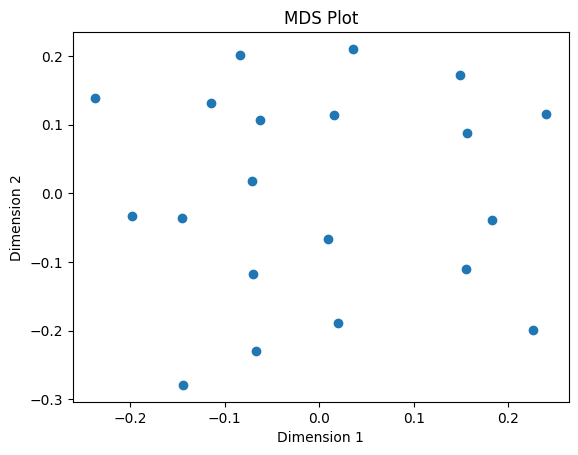

In [47]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('MDS Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()